In [131]:
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
import pyarrow.parquet as pq
import folium
import numpy as np
import utm
import xlrd

/tmp/ipykernel_12592/504002386.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  souterrain_2023 = pandas.read_csv(path+'souterrain_2023.csv', sep=';')


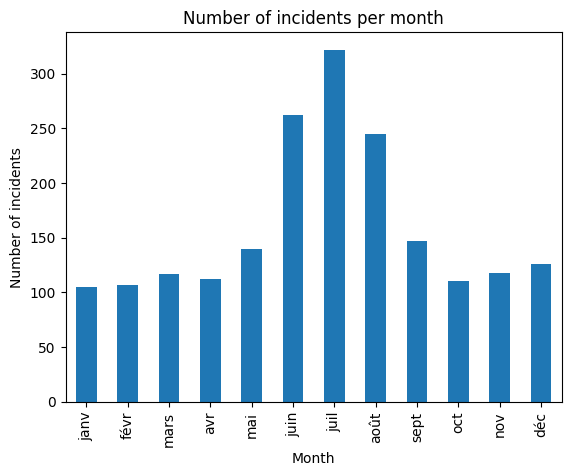

In [132]:
path = "data/"
# ouvrir les fichiers
incidents = pandas.read_csv(path+'donnees_incidents.csv', sep=';')
souterrain_2023 = pandas.read_csv(path+'souterrain_2023.csv', sep=';')
souterrain_troncons = pandas.read_csv(path+'souterrain_tronçons.csv', sep=';')
icu = pandas.read_csv(path+'icu.csv', sep=';')
temperatures = pq.read_table(path+'temperatures.parquet').to_pandas()
humidite = pq.read_table(path+'humidite.parquet').to_pandas()
nuages = pq.read_table(path+'nuages.parquet').to_pandas()

# plotly show number of incidents per month [january to december]
incidents_per_month = incidents.groupby('Mois (nom)').size()
# order months by chronological order
incidents_per_month = incidents_per_month.reindex(['janv', 'févr', 'mars', 'avr', 'mai', 'juin', 'juil', 'août', 'sept', 'oct', 'nov', 'déc'])
incidents_per_month.plot.bar()
plt.title('Number of incidents per month')
plt.xlabel('Month')
plt.ylabel('Number of incidents')
plt.show()

In [133]:
# rename column date_valid to date
temperatures = temperatures.rename(columns={'date_valid': 'date'})
temperatures = temperatures[(temperatures['longitude'] == -0.5) & (temperatures['latitude'] == 44.8)]
print(temperatures)

                       date    valeur  longitude  latitude
396365  2014-01-01 00:00:00  7.774957       -0.5      44.8
396366  2014-01-01 01:00:00  7.238580       -0.5      44.8
396367  2014-01-01 02:00:00  6.791040       -0.5      44.8
396368  2014-01-01 03:00:00  6.450281       -0.5      44.8
396369  2014-01-01 04:00:00  6.149072       -0.5      44.8
...                     ...       ...        ...       ...
52555   2023-12-31 20:00:00  7.485742       -0.5      44.8
52556   2023-12-31 21:00:00  7.599268       -0.5      44.8
52557   2023-12-31 22:00:00  7.424951       -0.5      44.8
52558   2023-12-31 23:00:00  7.691736       -0.5      44.8
52559   2024-01-01 00:00:00  7.263666       -0.5      44.8

[87625 rows x 4 columns]


In [134]:
humidite = humidite.rename(columns={'date_valid': 'date'})
humidite = humidite[(humidite['longitude'] == -0.5) & (humidite['latitude'] == 44.8)]

print(humidite)

                       date   valeur  longitude  latitude
362280  2015-01-01 01:00:00  95.3781       -0.5      44.8
362281  2015-01-01 02:00:00  95.6255       -0.5      44.8
362282  2015-01-01 03:00:00  96.4922       -0.5      44.8
362283  2015-01-01 04:00:00  96.8729       -0.5      44.8
362284  2015-01-01 05:00:00  96.5522       -0.5      44.8
...                     ...      ...        ...       ...
52555   2014-12-31 20:00:00  93.6539       -0.5      44.8
52556   2014-12-31 21:00:00  94.9962       -0.5      44.8
52557   2014-12-31 22:00:00  95.3521       -0.5      44.8
52558   2014-12-31 23:00:00  95.1859       -0.5      44.8
52559   2015-01-01 00:00:00  89.6640       -0.5      44.8

[87624 rows x 4 columns]


In [135]:
nuages = nuages.rename(columns={'date_valid': 'date'})
nuages = nuages[(nuages['longitude'] == -0.5) & (nuages['latitude'] == 44.8)]

print(nuages)

                       date    valeur  longitude  latitude
417270  2014-01-01 01:00:00   46.8750       -0.5      44.8
417271  2014-01-01 02:00:00   68.7500       -0.5      44.8
417272  2014-01-01 03:00:00   54.6875       -0.5      44.8
417273  2014-01-01 04:00:00   78.9062       -0.5      44.8
417274  2014-01-01 05:00:00   69.5312       -0.5      44.8
...                     ...       ...        ...       ...
52555   2023-12-31 20:00:00   58.5000       -0.5      44.8
52556   2023-12-31 21:00:00   98.5000       -0.5      44.8
52557   2023-12-31 22:00:00  100.0000       -0.5      44.8
52558   2023-12-31 23:00:00  100.0000       -0.5      44.8
52559   2024-01-01 00:00:00  100.0000       -0.5      44.8

[87697 rows x 4 columns]


In [136]:
# merge nuages, humidite and temperatures on date and longitude/latitude so that we have all the data in one dataframe with columns date, longitude, latitude, temperature, humidite, nuages
data = pandas.merge(temperatures, humidite, on=['date', 'longitude', 'latitude'])
data = pandas.merge(data, nuages, on=['date', 'longitude', 'latitude'])
# rename columns
data = data.rename(columns={'valeur_x': 'temperature', 'valeur_y': 'humidite', 'valeur': 'nuages'})
print(data.columns)


Index(['date', 'temperature', 'longitude', 'latitude', 'humidite', 'nuages'], dtype='object')


In [137]:
print(data)

                      date  temperature  longitude  latitude  humidite  \
0      2014-01-01 01:00:00     7.238580       -0.5      44.8   96.3460   
1      2014-01-01 02:00:00     6.791040       -0.5      44.8   96.7251   
2      2014-01-01 03:00:00     6.450281       -0.5      44.8   96.8599   
3      2014-01-01 04:00:00     6.149072       -0.5      44.8   96.8684   
4      2014-01-01 05:00:00     5.921381       -0.5      44.8   96.6164   
...                    ...          ...        ...       ...       ...   
87692  2023-12-31 20:00:00     7.485742       -0.5      44.8   87.9701   
87693  2023-12-31 21:00:00     7.599268       -0.5      44.8   89.4553   
87694  2023-12-31 22:00:00     7.424951       -0.5      44.8   90.7802   
87695  2023-12-31 23:00:00     7.691736       -0.5      44.8   91.7259   
87696  2024-01-01 00:00:00     7.263666       -0.5      44.8   93.2432   

         nuages  
0       46.8750  
1       68.7500  
2       54.6875  
3       78.9062  
4       69.5312  
...

In [138]:
data = data.drop(columns=['longitude', 'latitude'])
print(data)
# build a dataframe with collumns for each day (merge hours of the same day 2014-01-01 01:00:00  2014-01-01 02:00:00 ...) max_temperature, max_humidite, max_nuages, min_temperature, min_humidite, min_nuages, avg_temperature, avg_humidite, avg_nuages


                      date  temperature  humidite    nuages
0      2014-01-01 01:00:00     7.238580   96.3460   46.8750
1      2014-01-01 02:00:00     6.791040   96.7251   68.7500
2      2014-01-01 03:00:00     6.450281   96.8599   54.6875
3      2014-01-01 04:00:00     6.149072   96.8684   78.9062
4      2014-01-01 05:00:00     5.921381   96.6164   69.5312
...                    ...          ...       ...       ...
87692  2023-12-31 20:00:00     7.485742   87.9701   58.5000
87693  2023-12-31 21:00:00     7.599268   89.4553   98.5000
87694  2023-12-31 22:00:00     7.424951   90.7802  100.0000
87695  2023-12-31 23:00:00     7.691736   91.7259  100.0000
87696  2024-01-01 00:00:00     7.263666   93.2432  100.0000

[87697 rows x 4 columns]


In [139]:
# merge data with incidents on day (not hour)
data['date'] = pandas.to_datetime(data['date']).dt.date
# group by date and get the mean, max, min of each column
data = data.groupby('date').agg({'temperature': ['mean', 'max', 'min'], 'humidite': ['mean', 'max', 'min'], 'nuages': ['mean', 'max', 'min']})
print(data)

           temperature                        humidite                    \
                  mean        max       min       mean      max      min   
date                                                                       
2014-01-01    8.407479  10.476465  5.921381  86.976287  96.8684  72.3197   
2014-01-02   10.482559  13.003564  8.543604  89.939588  96.2094  81.1347   
2014-01-03   10.108455  12.519678  8.909326  94.035604  97.8528  89.3497   
2014-01-04    8.958734  12.460107  5.731348  86.352908  92.5699  68.4599   
2014-01-05    7.104425   8.300439  5.926172  90.596867  96.4792  78.9225   
...                ...        ...       ...        ...      ...      ...   
2023-12-28    8.285488  10.698633  5.638086  89.570104  96.0582  84.3870   
2023-12-29    8.902926  11.101221  7.414941  93.036104  98.1611  85.4284   
2023-12-30    9.410338  12.657373  7.106378  93.688367  98.8352  85.4002   
2023-12-31    9.315808  10.753809  7.424951  84.338154  93.6031  73.4484   
2024-01-01  

In [140]:
print(incidents.head())

   Client_AI  Client_AQN  PS_HTA_AI  PS_HTA_AQN  Année  Mois Mois (nom)  \
0     466750     1389002     403426     1181581   2016     1       janv   
1     445270     1389002     327686     1181581   2016     1       janv   
2     445270     1389002     327686     1181581   2016     1       janv   
3     466750     1389002     403426     1181581   2016     1       janv   
4     445270     1389002     327686     1181581   2016     1       janv   

  Année-Mois  Semaine  jour  ...   MIS_À_JOU  \
0  2016 - 01        1     6  ...  2020/02/10   
1  2016 - 01        1    10  ...  2018/07/31   
2  2016 - 01        2    12  ...  2018/07/31   
3  2016 - 01        2    14  ...  2020/02/16   
4  2016 - 01        2    13  ...  2020/01/08   

                                      TECHNOLOGI INTENSITÉ  DÉSIGNAT1  \
0                    S6 - Synthétique NF C33-226     377.0  150 AL S6   
1                    S6 - Synthétique NF C33-226     377.0  150 AL S6   
2  PM - Papier métallisé tripolaire champ

In [141]:
# add a column count "incidents' to data that contains the number of incidents for each Date d'interruption (format : 42375) and where COMMUNE == BORDEAUX
incidents = incidents[incidents['Territoire'] == 'Métropole']
print(incidents)



      Client_AI  Client_AQN  PS_HTA_AI  PS_HTA_AQN  Année  Mois Mois (nom)  \
0        466750     1389002     403426     1181581   2016     1       janv   
3        466750     1389002     403426     1181581   2016     1       janv   
7        466750     1389002     403426     1181581   2016     1       janv   
11       466750     1389002     403426     1181581   2016     1       janv   
12       466750     1389002     403426     1181581   2016     1       janv   
...         ...         ...        ...         ...    ...   ...        ...   
1869     466750     1389002     403426     1181581   2016     7       juil   
1870     466750     1389002     403426     1181581   2016     9       sept   
1890     475497     1407755     406693     1208948   2017    12        déc   
1895     487054     1428927     412778     1214770   2018     6       juin   
1898     496536     1452441     424279     1258297   2019     1       janv   

     Année-Mois  Semaine  jour  ...   MIS_À_JOU  \
0     2016 -

In [142]:
# convert Date d'interruption 42375 to datetime
incidents['Date d\'interruption'] = pandas.to_datetime(incidents['Date d\'interruption'], unit='D', origin='1899-12-30')
# convert datetime to date
incidents['Date d\'interruption'] = pandas.to_datetime(incidents['Date d\'interruption']).dt.date
# group by date and count the number of incidents
incidents = incidents.groupby('Date d\'interruption').size()
print(incidents)


Date d'interruption
2015-01-29    1
2015-02-06    1
2015-02-07    1
2015-02-26    1
2015-02-28    1
             ..
2023-12-05    1
2023-12-08    1
2023-12-29    2
2024-01-01    1
2024-01-02    1
Length: 511, dtype: int64


In [143]:
#rename Date d'interruption to date and count to incidents
incidents = incidents.reset_index(name='incidents')
incidents = incidents.rename(columns={'Date d\'interruption': 'date'})
print(incidents)


           date  incidents
0    2015-01-29          1
1    2015-02-06          1
2    2015-02-07          1
3    2015-02-26          1
4    2015-02-28          1
..          ...        ...
506  2023-12-05          1
507  2023-12-08          1
508  2023-12-29          2
509  2024-01-01          1
510  2024-01-02          1

[511 rows x 2 columns]


In [144]:
# change number of incidents to 0 if there is no incident, 1 if there is 1 incident, 2 if there is 2 or more incidents
incidents['incidents'] = numpy.where(incidents['incidents'] > 1, 2, incidents['incidents'])
print(incidents)
print("Number of days with 0 incidents : ", incidents[incidents['incidents'] == 0].shape[0])
print("Number of days with 1 incident : ", incidents[incidents['incidents'] == 1].shape[0])
print("Number of days with 2 or more incidents : ", incidents[incidents['incidents'] == 2].shape[0])
        

           date  incidents
0    2015-01-29          1
1    2015-02-06          1
2    2015-02-07          1
3    2015-02-26          1
4    2015-02-28          1
..          ...        ...
506  2023-12-05          1
507  2023-12-08          1
508  2023-12-29          2
509  2024-01-01          1
510  2024-01-02          1

[511 rows x 2 columns]
Number of days with 0 incidents :  0
Number of days with 1 incident :  394
Number of days with 2 or more incidents :  117


In [145]:
#merge data and incidents on date
data = pandas.merge(data, incidents, on=['date'], how='left')
print(data)

            date  (temperature, mean)  (temperature, max)  (temperature, min)  \
0     2014-01-01             8.407479           10.476465            5.921381   
1     2014-01-02            10.482559           13.003564            8.543604   
2     2014-01-03            10.108455           12.519678            8.909326   
3     2014-01-04             8.958734           12.460107            5.731348   
4     2014-01-05             7.104425            8.300439            5.926172   
...          ...                  ...                 ...                 ...   
3648  2023-12-28             8.285488           10.698633            5.638086   
3649  2023-12-29             8.902926           11.101221            7.414941   
3650  2023-12-30             9.410338           12.657373            7.106378   
3651  2023-12-31             9.315808           10.753809            7.424951   
3652  2024-01-01             7.263666            7.263666            7.263666   

      (humidite, mean)  (hu

/tmp/ipykernel_12592/2223774249.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data = pandas.merge(data, incidents, on=['date'], how='left')


In [151]:
# fil NaN values with 0
data = data.fillna(0)
print("Number of days with 0 incidents : ", data[data['incidents'] == 0].shape[0])
print("Number of days with 1 incident : ", data[data['incidents'] == 1].shape[0])
print("Number of days with 2 or more incidents : ", data[data['incidents'] == 2].shape[0])



Number of days with 0 incidents :  3143
Number of days with 1 incident :  393
Number of days with 2 or more incidents :  117
